## ML_Zoomcamp October 2021
   
    PROJECT 1 by Subramanian Hariharan

## Problem Statement

A campus recruitment program is a program conducted within universities or other educational institutions that helps students as they near graduation find employment. As part of this program, educational institutions partner with corporations that wish to recruit from student populations.

The placement of a student depends on various factors like their performance in school and colleges, work experience, etc.  

The objective here is to predict if a student will get placed or not.

 
Evaluation Criteria 

Submissions are evaluated using the Accuracy Score.




This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization.

 

### Data Description

Some of the columns in the data are listed below:

gender: Gender of the candidate (male/female)

ssc_b: senior secondary board

ssc_p: senior secondary percentage scored

hsc_b: higher secondary board

hsc_p: higher secondary percentage scored

hsc_s: higher secondary subject

degree_p: percentage scored in degree/graduation

etest_p: entrance test percentage scored

mba_p: mba percentage scored

specialization: mba specialization

workex: work experience

status: placed or not placed (target variable)

source of data https://dphi.tech/challenges/data-sprint-42-campus-recruitment/146/overview/about

In [321]:
#import all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [322]:
#import train and test dataset
df_full_train = pd.read_csv('Train_Data.csv')
df_test = pd.read_csv('Test_Data.csv')

In [323]:
#check shape of train and test data
df_full_train.shape,df_test.shape

((670, 13), (448, 12))

In [324]:
df_full_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed


In [325]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          670 non-null    object 
 1   ssc_p           670 non-null    float64
 2   ssc_b           670 non-null    object 
 3   hsc_p           670 non-null    float64
 4   hsc_b           670 non-null    object 
 5   hsc_s           670 non-null    object 
 6   degree_p        670 non-null    float64
 7   degree_t        670 non-null    object 
 8   etest_p         670 non-null    float64
 9   mba_p           670 non-null    float64
 10  specialisation  670 non-null    object 
 11  workex          670 non-null    object 
 12  status          670 non-null    object 
dtypes: float64(5), object(8)
memory usage: 68.2+ KB


In [326]:
# separating numeric and cat columns for further analysis
numeric_col = list(df_full_train.select_dtypes(exclude='object').columns)
cat_columns = list(df_full_train.select_dtypes(include ='object').columns)

In [327]:
numeric_col

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [328]:
cat_columns.remove('status')
cat_columns

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'workex']

In [329]:
#checking for null values
df_full_train.isnull().sum().sum()

0

In [330]:
df_test.isnull().sum().sum()

0

There are no null values in the dataset (both train and test)

In [331]:
df_full_train[numeric_col].describe().T #looking at descriptive stat of numeric cols

,count,mean,std,min,25%,50%,75%,max
ssc_p,670.0,68.960017,10.182563,42.864579,61.619318,68.332563,77.130019,89.400000
hsc_p,670.0,65.203006,11.222577,37.106247,60.431420,64.753270,71.390402,97.700000
degree_p,670.0,65.229034,7.157608,50.000000,60.000000,64.906329,70.271632,91.000000
etest_p,670.0,73.740025,12.101840,50.000000,64.199327,72.677821,83.955186,97.938047
mba_p,670.0,62.993108,5.126855,51.290000,59.431996,62.481656,66.864202,77.890000


The numeric cols basically consist of gades scored in various qualifying exams . There seems to no major skew in the numeric data . we will have a look at the distribution to confirm that

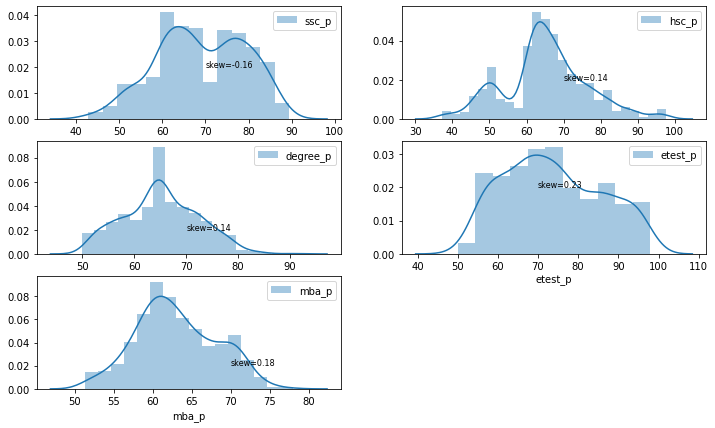

In [332]:
count=1
n=5
plt.figure(figsize=(12,12))
for i in numeric_col:
    plt.subplot(n,2,count)
    sns.distplot(df_full_train[i],label=[str(i)])
    plt.text(70,0.02, f'skew={str(round(df_full_train[i].skew(),2))}', fontsize =8)
    plt.legend()
    count+=1

plt.show()

The examination of distribution reveals no major skew in the data. We may not need a transformation to normalise the distribution

In [333]:
df_full_train['status'].value_counts(normalize=True)

Placed        0.655224
Not Placed    0.344776
Name: status, dtype: float64

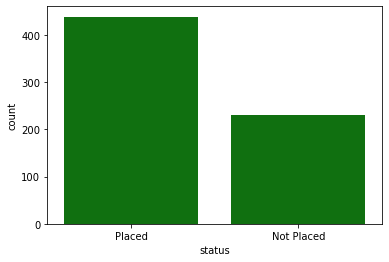

In [334]:
# lets examine the distribution of target variable
sns.countplot(df_full_train['status'],color='g')
plt.show()

The target variable is not unbalanced for us to correct it by oversampling/undersampling/SMOTE

In [335]:
for col in cat_columns: #unique values in cat columns
    print(f'Unique values in {col} are \n {df_full_train[col].unique()}')

Unique values in gender are 
 ['M' 'F']
Unique values in ssc_b are 
 ['Central' 'Others']
Unique values in hsc_b are 
 ['Others' 'Central']
Unique values in hsc_s are 
 ['Science' 'Commerce' 'Arts']
Unique values in degree_t are 
 ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in specialisation are 
 ['Mkt&HR' 'Mkt&Fin']
Unique values in workex are 
 ['Yes' 'No']


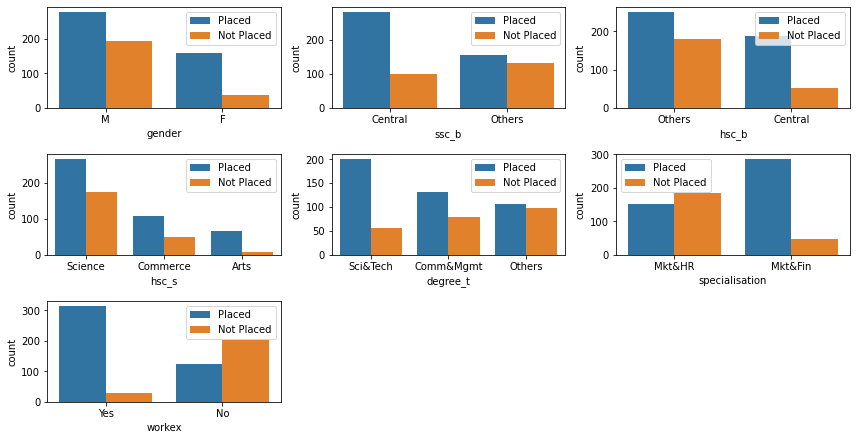

In [336]:
# looking at distribution of cat features
count=1
n=8
plt.figure(figsize=(12,16))
for i in cat_columns:
    plt.subplot(n,3,count)
    sns.countplot(df_full_train[i],hue=df_full_train['status'])
    plt.legend()
    plt.tight_layout()
    count+=1

plt.show()

Following observations are relevant for above plots :

- More Males have status placed . The ratio of placed/not placed for women are higher than males

- ssc_b with central board has higher chance of placed. If ur from other Boards u have equal chance of placed or not placed

- hsc_b with other board has higher placement than central. But from central hsc_b there is more chance of placed thna not placed

- Science stream has got max placement in hsc_s

- Science stream has max placement in degree_t

- in MBA marketing and fin has more placement

- if u have work experience there is a high chance of placed. If there is no work experience there is equal chance of placed/not placed



Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [337]:
from sklearn.metrics import mutual_info_score
for col in cat_columns:
    print(f'Mutual Info score between {col} and Status is {mutual_info_score(df_full_train[col],df_full_train.status)}')

Mutual Info score between gender and Status is 0.024942299605664506
Mutual Info score between ssc_b and Status is 0.022329425622135357
Mutual Info score between hsc_b and Status is 0.021657971949285787
Mutual Info score between hsc_s and Status is 0.02236624345927475
Mutual Info score between degree_t and Status is 0.02630330123719357
Mutual Info score between specialisation and Status is 0.09428317476094494
Mutual Info score between workex and Status is 0.17249254727638466


The MI score indicates workex has max score indicative of stromng feature to predict status 

In [338]:
# we will check chisquare stat checks for independence to see assciantion beytween cat features and target variable
for col in cat_columns:
    print(f'chi-square test between {col} and target variable status')
    print(chi2_contingency(pd.crosstab(df_full_train['gender'],df_full_train.status)))
    print("\n")

chi-square test between gender and target variable status
(30.24006879371943, 3.817409131376951e-08, 1, array([[ 67.23134328, 127.76865672],
       [163.76865672, 311.23134328]]))


chi-square test between ssc_b and target variable status
(30.24006879371943, 3.817409131376951e-08, 1, array([[ 67.23134328, 127.76865672],
       [163.76865672, 311.23134328]]))


chi-square test between hsc_b and target variable status
(30.24006879371943, 3.817409131376951e-08, 1, array([[ 67.23134328, 127.76865672],
       [163.76865672, 311.23134328]]))


chi-square test between hsc_s and target variable status
(30.24006879371943, 3.817409131376951e-08, 1, array([[ 67.23134328, 127.76865672],
       [163.76865672, 311.23134328]]))


chi-square test between degree_t and target variable status
(30.24006879371943, 3.817409131376951e-08, 1, array([[ 67.23134328, 127.76865672],
       [163.76865672, 311.23134328]]))


chi-square test between specialisation and target variable status
(30.24006879371943, 3.817

 We see that p value is almost 0 indicative of failure to accept Null Hypothesis and conclude that there is association betweeen two features

In [339]:
#converting target variable to numeric
df_full_train.status = (df_full_train.status == 'Placed').astype(int)

In [340]:
# getting correlation matrix for numerical features with target 
df_full_train[numeric_col].corrwith(df_full_train.status)

ssc_p       0.680949
hsc_p       0.634795
degree_p    0.537049
etest_p     0.232942
mba_p       0.265365
dtype: float64

We see that most of the continuos features are well correlated with target variable

In [341]:
df_full_train.status.unique()

array([1, 0])

In [342]:
df_full_train.gender.unique()

array(['M', 'F'], dtype=object)

In [343]:
global_mean = df_full_train.status.mean()
round(global_mean, 3) #0.65 are status 1 or placed or in another word 'placement_rate'

0.655

In [344]:
#feature importance
female_mean = df_full_train[df_full_train.gender == 'F'].status.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_full_train[df_full_train.gender == 'M'].status.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.815
gender == male:   0.589


In [345]:
female_mean / global_mean, male_mean / global_mean

(1.24443665673734, 0.8996523198657234)

The placement rate of female is higher than global mean whereas that of male are marginally lower than global mean.


Placement rate for gender
placement rate of M is 0.8996523198657234
placement rate of F is 1.24443665673734




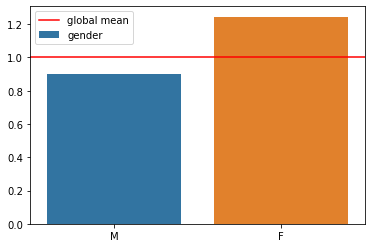

Placement rate for ssc_b
placement rate of Central is 1.1336310751588852
placement rate of Others is 0.8238289285967637




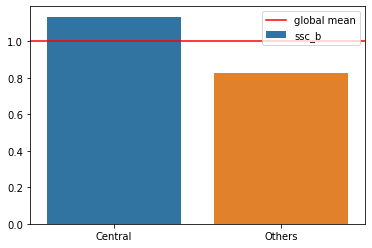

Placement rate for hsc_b
placement rate of Others is 0.8902809415337889
placement rate of Central is 1.1991539212495932




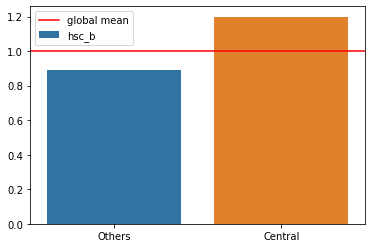

Placement rate for hsc_s
placement rate of Science is 0.9226547939531993
placement rate of Commerce is 1.0401462501632255
placement rate of Arts is 1.3798483477392578




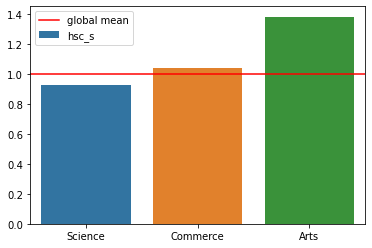

Placement rate for degree_t
placement rate of Sci&Tech is 1.193639594763479
placement rate of Comm&Mgmt is 0.9566108271299495
placement rate of Others is 0.8005047121354236




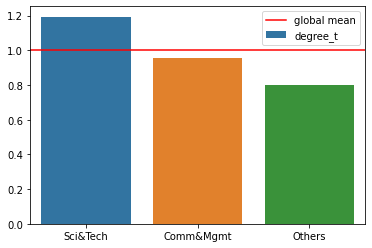

Placement rate for specialisation
placement rate of Mkt&HR is 0.6924829157175398
placement rate of Mkt&Fin is 1.30751708428246




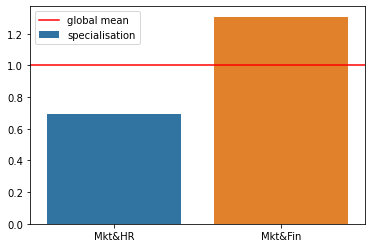

Placement rate for workex
placement rate of Yes is 1.397534036128622
placement rate of No is 0.5805162318151963




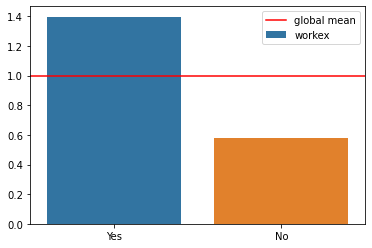

In [346]:
for col in cat_columns:
    print(f'Placement rate for {col}')
    unique_values =df_full_train[col].unique()
    placement_rate =[]
    for element in unique_values:
        element_placement_rate = (df_full_train[df_full_train[col] == element].status.mean()/global_mean)
        placement_rate.append(element_placement_rate)
        print(f'placement rate of {element} is {element_placement_rate}')
    print('\n')
    sns.barplot(x=unique_values,y=placement_rate,label=col)
    plt.axhline(1.0,color='red',label='global mean')
    plt.legend()
    plt.show()
    

We can see that whereever the ratio is > 1.0 , there is more likely to be 'placed'. The features female_gender,hsc_s_arts,degree_t_science, workex_yes are more likely to be placed as their placement rate is considerably higher . In the figure wherever the bars are higher than red line(global mean) then that feature is more likely to be placed. The amount of bar above and below the red line will indicate relative chance of placement or Not Placed

In [347]:
# splitting the train dataset to train and validation
from sklearn.model_selection import train_test_split
train,val = train_test_split(df_full_train,test_size=0.2,random_state=42)

In [348]:
train.shape,val.shape

((536, 13), (134, 13))

In [349]:
# assigning X and y
X_train = train.drop('status',axis=1)
y_train = train['status']
X_val = val.drop('status',axis=1)
y_val = val['status']

we will use dictvectorizer to convert cat columns to numeric

In [350]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [351]:
train_dict = X_train.to_dict(orient='records')
X_train_encoded = dv.fit_transform(train_dict)

In [352]:
dv.get_feature_names()

['degree_p',
 'degree_t=Comm&Mgmt',
 'degree_t=Others',
 'degree_t=Sci&Tech',
 'etest_p',
 'gender=F',
 'gender=M',
 'hsc_b=Central',
 'hsc_b=Others',
 'hsc_p',
 'hsc_s=Arts',
 'hsc_s=Commerce',
 'hsc_s=Science',
 'mba_p',
 'specialisation=Mkt&Fin',
 'specialisation=Mkt&HR',
 'ssc_b=Central',
 'ssc_b=Others',
 'ssc_p',
 'workex=No',
 'workex=Yes']

In [353]:
val_dict = X_val.to_dict(orient='records') #applying ohe for val data
X_val_encoded = dv.transform(val_dict)

In [354]:
X_train_encoded.shape,y_train.shape,X_val_encoded.shape,y_val.shape

((536, 21), (536,), (134, 21), (134,))

As the data preparation phase is over , we can build model in an iterative method

In [355]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

In [356]:
import time
from sklearn.metrics import accuracy_score
start = time.time() #start of the block timer
#model building with basic models
def basic_model_building(model,X_train,y_train,X_test,y_test):
    ''' This function takes in a model and train and test dataset
        and returns model, train and test accuracy score 
        for a classification problem'''
    clf = model
    clf.fit(X_train,y_train) #fit the model
    y_train_pred = clf.predict_proba(X_train)[:, 1] #prediction of trg set
    y_pred = clf.predict_proba(X_test)[:, 1] #prediction of val set
    train_acc = accuracy_score(y_train, y_train_pred >= 0.5)
    val_acc = accuracy_score(y_val, y_pred >= 0.5)
    return train_acc,val_acc

In [357]:
# define a list of models and model_names
models = [LogisticRegression(max_iter = 500),DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=500),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=0)]

model_names = ['LogisticRegression','DecisionTree','RandomForest','XGB','LGBM','catboost']
#create empty list for storing model specific metrics
Training_accuracy =[]
validation_accuracy =[]

#call the function and get metrics
for model in models:
    train_acc,val_acc = basic_model_building(model,X_train_encoded,y_train,X_val_encoded,y_val)
    validation_accuracy.append(val_acc)
    Training_accuracy.append(train_acc)
    
    
#create a df for model vs trg and testing accuracy
acc_df =pd.DataFrame({'Model':model_names,'Training_Accuracy':Training_accuracy,
                      'Validation_Accuracy':validation_accuracy,})

end = time.time() #end of block timer
print ("Time elapsed:", end - start)

C:\Users\dbazoneny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dbazoneny\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time elapsed: 2.967299222946167


In [358]:
acc_df

,Model,Training_Accuracy,Validation_Accuracy
0,LogisticRegression,0.916045,0.932836
1,DecisionTree,1.000000,0.932836
2,RandomForest,1.000000,0.962687
3,XGB,1.000000,0.940299
4,LGBM,1.000000,0.932836
5,catboost,1.000000,0.955224


We shall train the model on entire train set prior testing it on test set

In [359]:
# create a full training dataset for final training prior using on test det
X_full_trg = df_full_train.drop('status',axis=1)
y_full_trg = df_full_train['status']
full_trg_dicts =  X_full_trg.to_dict(orient='records')
X_full_trg_encoded = dv.fit_transform(full_trg_dicts)

In [360]:
# using model to predict on test set
test_dict = df_test.to_dict(orient='records')
X_test_encoded = dv.transform(test_dict)

In [361]:
#fitting LR on full trg dataset
model = LogisticRegression(max_iter=500)
model.fit(X_full_trg_encoded,y_full_trg)
preds = model.predict(X_test_encoded) #prediction of val set

C:\Users\dbazoneny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [362]:
len(preds)

448

In [363]:
#creating submission file for test dataset
df_preds = pd.DataFrame({'prediction': preds})
df_preds['prediction'] = df_preds['prediction'].map({1:'Placed',0:'Not Placed'})
df_preds.prediction.value_counts()

Placed        300
Not Placed    148
Name: prediction, dtype: int64

In [364]:
#df_preds.to_csv('Submission_1.csv',index=False)

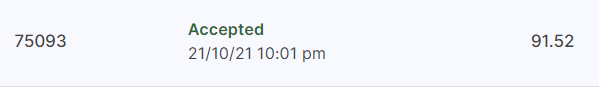


The scores obtained on the dphi portal for the test dataset is seen above. 

### TUNING LOGISTIC REGRESSION MODEL

In [365]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_full_trg_encoded,y_full_trg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.917413 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.912438 (0.029784) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910945 (0.029722) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.911940 (0.028411) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.912935 (0.029871) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.913433 (0.028684) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.912438 (0.027985) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.909950 (0.031891) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.916915 (0.028498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913433 (0.028424) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.906965 (0.026611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.917413 (0.029027) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915920 (0.025412) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.911443 (0.028563) with: {

C:\Users\dbazoneny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [366]:
#fit tuned LR on entire trg set
model = LogisticRegression(max_iter=500,C= 0.1, penalty= 'l2',solver= 'lbfgs')
model.fit(X_full_trg_encoded,y_full_trg)
preds = model.predict(X_test_encoded) #prediction of test set

In [367]:
df_preds = pd.DataFrame({'prediction': preds})
df_preds['prediction'] = df_preds['prediction'].map({1:'Placed',0:'Not Placed'})
#df_preds.to_csv('Submission_2.csv',index=False)

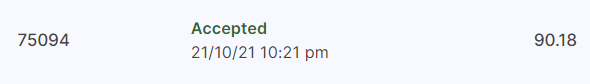

The scores obtained for tuned LR is marginally less than default LR. 

## RANDOM FOREST TUNING

In [368]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256,512,1024]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train_encoded, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.89555209 0.89738664 0.90301142 0.90297681 0.90669782 0.95154033
 0.94591554 0.95524403 0.95711319 0.95711319 0.95337487 0.95711319
 0.95711319 0.95898235 0.95711319], using {'max_depth': 16, 'n_estimators': 512}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087352,0.007521,0.007259,0.007075,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.879630,0.878505,0.906542,0.869159,0.943925,0.895552,0.027208,15
1,0.164477,0.006834,0.012501,0.006251,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.898148,0.878505,0.925234,0.859813,0.925234,0.897387,0.025767,14
2,0.307915,0.003726,0.014509,0.002233,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.888889,0.878505,0.934579,0.878505,0.934579,0.903011,0.026053,12
3,0.619893,0.007596,0.036396,0.006540,2,512,"{'max_depth': 2, 'n_estimators': 512}",0.907407,0.878505,0.925234,0.869159,0.934579,0.902977,0.025520,13
4,1.209585,0.010526,0.084374,0.007655,2,1024,"{'max_depth': 2, 'n_estimators': 1024}",0.916667,0.878505,0.934579,0.869159,0.934579,0.906698,0.027778,11
5,0.087500,0.007658,0.003125,0.006250,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.925926,0.953271,0.962617,0.953271,0.962617,0.951540,0.013472,9
6,0.168791,0.006249,0.012650,0.006331,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.935185,0.943925,0.962617,0.934579,0.953271,0.945916,0.010776,10
7,0.330489,0.006929,0.021876,0.007655,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.944444,0.943925,0.981308,0.943925,0.962617,0.955244,0.014877,7
8,0.684531,0.008309,0.046875,0.000002,8,512,"{'max_depth': 8, 'n_estimators': 512}",0.944444,0.953271,0.971963,0.953271,0.962617,0.957113,0.009390,2
9,1.357273,0.025874,0.092907,0.001685,8,1024,"{'max_depth': 8, 'n_estimators': 1024}",0.944444,0.953271,0.971963,0.953271,0.962617,0.957113,0.009390,2


In [369]:
#Fit the tuned RF on entire training dataset and use it for prediction on test datatset
model_rf = RandomForestClassifier(max_depth=16, n_estimators= 512)
model_rf.fit(X_full_trg_encoded,y_full_trg)
preds = model_rf.predict(X_test_encoded) #prediction of test set
df_preds = pd.DataFrame({'prediction': preds}) #making a dataframe on predictions
df_preds['prediction'] = df_preds['prediction'].map({1:'Placed',0:'Not Placed'})
#df_preds.to_csv('Submission_3.csv',index=False) #creating a submissions file

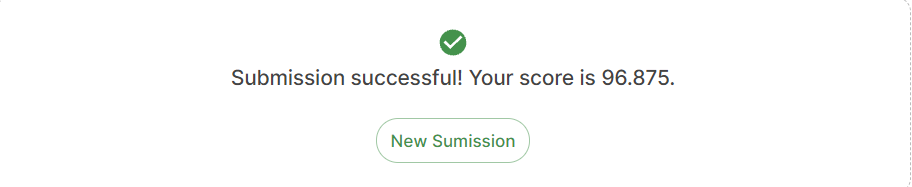

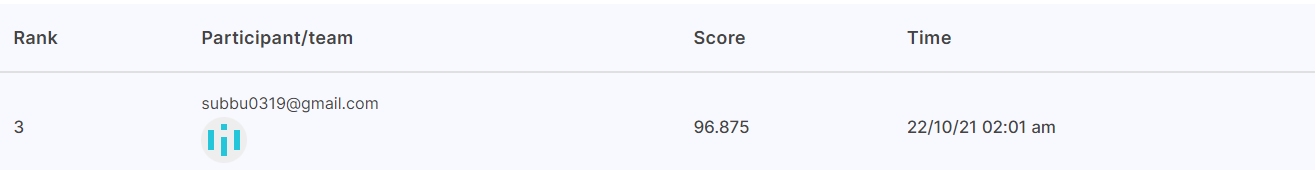

As seen above the Tuned RFClassifier has performed well on test dataset(unseen data) and we can use this as our final model. There is a possibility the other models like xgboost, LGBM , catboost could provide a better model if tuned. However seeing the marginal improvement which can come out of such exercise it is not being explored further. It is also opined that scaling the continuous features may provide marginal improvement but RF model is a tree based model and scaling the data may not help much.  We will use pickle to save this model as well as the dictvectorizer

### saving the model

In [370]:
import pickle
with open("project1_model","wb") as f_out:
    pickle.dump((dv,model),f_out)

In [379]:
#loading the model and check
with open("project1_model","rb") as f_in:
    dv,model_loaded = pickle.load(f_in)

In [380]:
check_data = val[:1] # lets look at first data in validation datset for checks
check_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
361,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,56.0,61.3,Mkt&Fin,Yes,1


In [381]:
check_dict = check_data.to_dict(orient='records')
check_dict

[{'gender': 'M',
  'ssc_p': 71.0,
  'ssc_b': 'Central',
  'hsc_p': 58.66,
  'hsc_b': 'Central',
  'hsc_s': 'Science',
  'degree_p': 58.0,
  'degree_t': 'Sci&Tech',
  'etest_p': 56.0,
  'mba_p': 61.3,
  'specialisation': 'Mkt&Fin',
  'workex': 'Yes',
  'status': 1}]

In [383]:
check_encoded = dv.transform(check_dict)
model_loaded.predict_proba(check_encoded)[:,1]

array([0.7132981])

The model predicts correctly that the candidate will be placed with probability of 71% and hence assigned status as 'Placed'.